<a href="https://colab.research.google.com/github/Adarsh232001/Credit_card_lead_prediction/blob/main/Credict_card_lead_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
test = pd.read_csv('test data credit card.csv')
test.drop(['ID'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               105312 non-null  object
 1   Age                  105312 non-null  int64 
 2   Region_Code          105312 non-null  object
 3   Occupation           105312 non-null  object
 4   Channel_Code         105312 non-null  object
 5   Vintage              105312 non-null  int64 
 6   Credit_Product       92790 non-null   object
 7   Avg_Account_Balance  105312 non-null  int64 
 8   Is_Active            105312 non-null  object
dtypes: int64(3), object(6)
memory usage: 7.2+ MB


In [ ]:
test

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...
105307,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,Male,53,RG254,Other,X3,93,No,737178,Yes


In [ ]:
train = pd.read_csv('train data credit card.csv')
train.drop(['ID'], inplace= True, axis= 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [ ]:
train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [ ]:
train.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


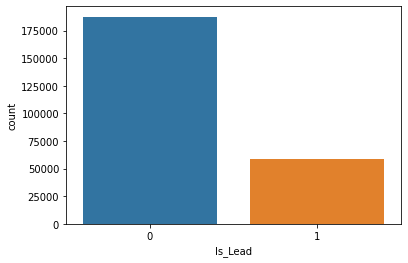

In [ ]:
sns.countplot(train['Is_Lead'])

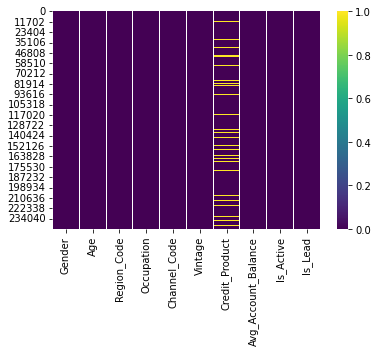

In [ ]:
sns.heatmap(train.isnull(), cmap='viridis')

In [ ]:
train['Credit_Product'].fillna(train['Credit_Product'].mode().iloc[0], inplace = True)

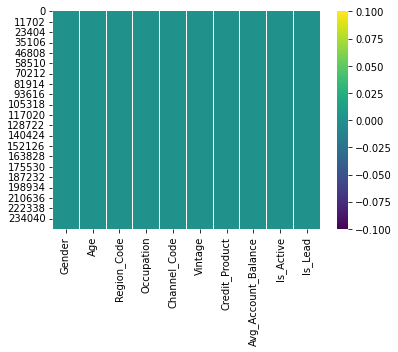

In [ ]:
train.isnull().sum()
sns.heatmap(train.isnull(), cmap='viridis')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       245725 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [ ]:
encode = OrdinalEncoder()
train[['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']] = encode.fit_transform(train[['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']])
train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0.0,73,18.0,1.0,2.0,43,0.0,1045696,0.0,0
1,0.0,30,27.0,2.0,0.0,32,0.0,581988,0.0,0
2,0.0,56,18.0,3.0,2.0,26,0.0,1484315,1.0,0
3,1.0,34,20.0,2.0,0.0,19,0.0,470454,0.0,0
4,0.0,30,32.0,2.0,0.0,33,0.0,886787,0.0,0
...,...,...,...,...,...,...,...,...,...,...
245720,1.0,51,34.0,3.0,2.0,109,0.0,1925586,0.0,0
245721,1.0,27,18.0,2.0,0.0,15,0.0,862952,1.0,0
245722,0.0,26,31.0,2.0,0.0,13,0.0,670659,0.0,0
245723,0.0,28,23.0,2.0,0.0,31,0.0,407504,0.0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               245725 non-null  float64
 1   Age                  245725 non-null  int64  
 2   Region_Code          245725 non-null  float64
 3   Occupation           245725 non-null  float64
 4   Channel_Code         245725 non-null  float64
 5   Vintage              245725 non-null  int64  
 6   Credit_Product       245725 non-null  float64
 7   Avg_Account_Balance  245725 non-null  int64  
 8   Is_Active            245725 non-null  float64
 9   Is_Lead              245725 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 18.7 MB


In [ ]:
train.astype(int)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0
...,...,...,...,...,...,...,...,...,...,...
245720,1,51,34,3,2,109,0,1925586,0,0
245721,1,27,18,2,0,15,0,862952,1,0
245722,0,26,31,2,0,13,0,670659,0,0
245723,0,28,23,2,0,31,0,407504,0,0


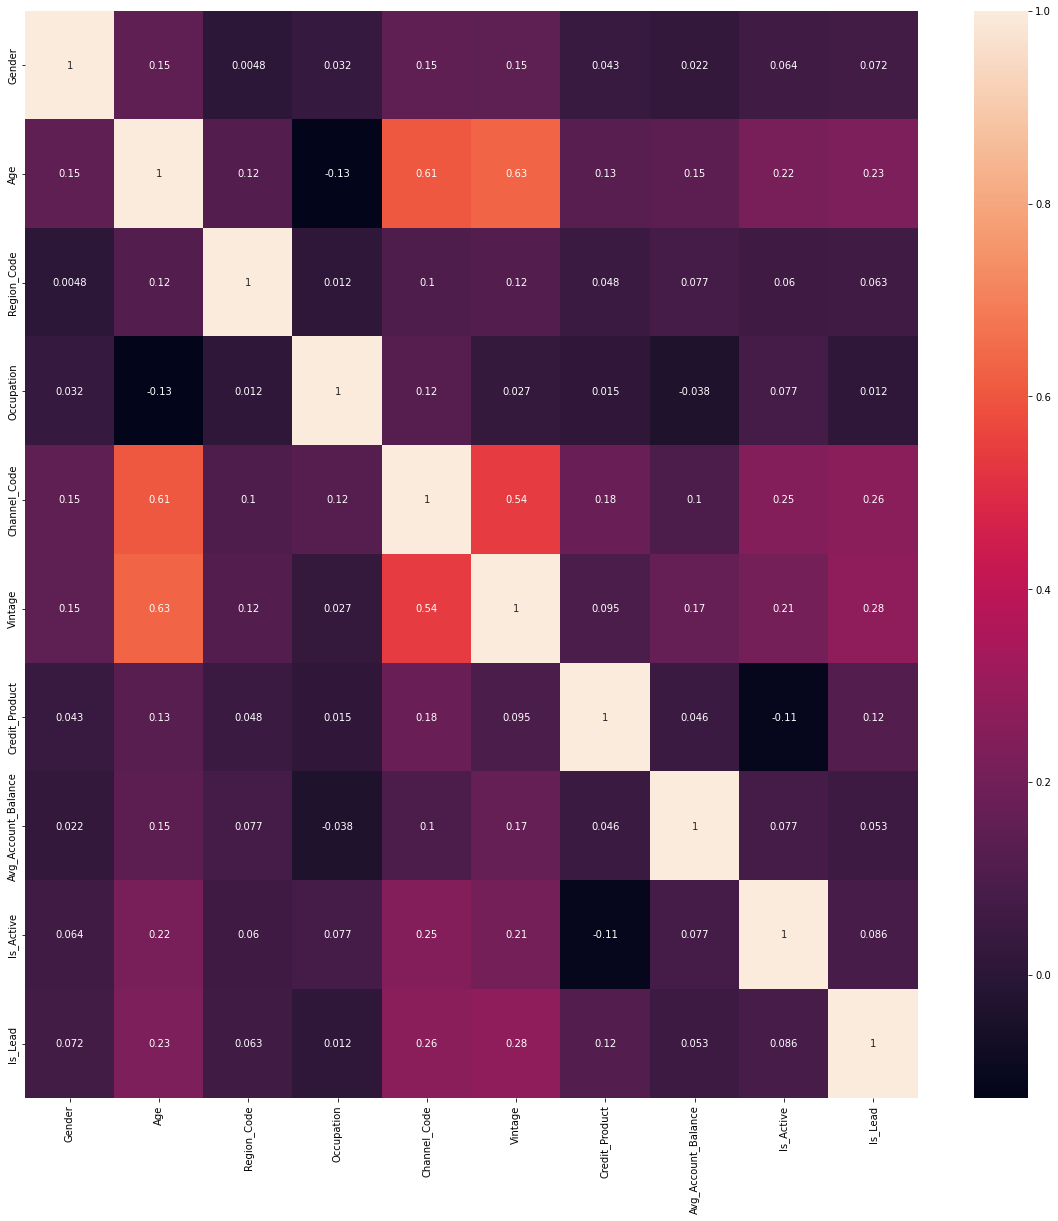

In [ ]:
cm_1 = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm_1, annot=True)
plt.show()

In [ ]:
y = train['Is_Lead']
x = train.drop(['Is_Lead'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))

-0.31341422131950747


In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
print(r2_score(y_test, y_pred=))

SyntaxError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_predict = rfc_model.predict(x_test)
print(r2_score(y_test, rfc_predict))

-0.22687865867330714
